# Analysis of the Result from All Models

List of models:
- LR
- ECC
- RETAIN
- LEAP
- ~DMNC~ (Cannot run)
- GAMENet
- SafeDrug

In [81]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (5.0,4.0)

In [82]:
def stats(d, additional):
    dct = {
        'ddi_rate': { 'mean': np.mean(d['ddi_rate']), 'sd': np.std(d['ddi_rate']) },
        'jaccard': { 'mean': np.mean(d['ja']), 'sd': np.std(d['ja']) },
#         'avg_p': { 'mean': np.mean(d['avg_p']), 'sd': np.std(d['avg_p']) }, 
#         'avg_r': { 'mean': np.mean(d['avg_r']), 'sd': np.std(d['avg_r']) }, 
        'avg_f1': { 'mean': np.mean(d['avg_f1']), 'sd': np.std(d['avg_f1']) }, 
        'prauc': { 'mean': np.mean(d['prauc']), 'sd': np.std(d['prauc']) }, 
        'med': { 'mean': np.mean(d['med']), 'sd': np.std(d['med']) }
    }
    if additional:
        t_ddi = additional['target_ddi']['val']
        c_ddi = dct['ddi_rate']['mean']
        chng = round(((c_ddi - t_ddi)/t_ddi) * 100, 2)
        dct = {**additional, 'ddi_change%': {'val': chng}, **dct}
    return dct

def format_stats(d, additional={}):
    dd = stats(d, additional)
    dct = {}
    for k, v in dd.items():
        if "mean" in v:
            dct[k] = "{:.4f} \u00B1 {:.4f}".format(v['mean'], v['sd'])
        else:
            dct[k] = "{}".format(v['val'])
    return dct

def flats(d):
    return {
        'ddi_rate': d['ddi_rate'][0],
        'jaccard': d['jaccard'][0],
#         'avg_p': d['avg_p'][0],
#         'avg_r': d['avg_r'][0],
        'avg_f1': d['avg_f1'][0],
        'prauc': d['prauc'][0],
        'med': d['med'][0]
    }

def format_flats(d):
    dd = flats(d)
    dct = {}
    for k, v in dd.items():
        dct[k] = "{:.4f}".format(v)
    return dct

In [83]:
lr = pickle.load(open('saved/LR/history.pkl', 'rb'))
ecc = pickle.load(open('saved/ECC/history.pkl', 'rb'))
retain = pickle.load(open('saved/Retain/history_Retain.pkl', 'rb'))
leap = pickle.load(open('saved/Leap/history_Leap.pkl', 'rb'))
gamenet = pickle.load(open('saved/GAMENet/history_GAMENet.pkl', 'rb'))
safedrug = pickle.load(open('saved/SafeDrug/history_SafeDrug.pkl', 'rb'))

In [84]:
lr

defaultdict(list,
            {'fittime': [284.9134564399719],
             'pretime': [346.7924716472626],
             'jaccard': [0.48997015384454545],
             'ddi_rate': [0.07745666327848136],
             'avg_p': [0.7226821497593763],
             'avg_r': [0.6077673964740221],
             'avg_f1': [0.6470246350838804],
             'prauc': [0.7552892070704925],
             'med': [16.471282051282053]})

In [85]:
# retain

In [86]:
# stats(leap)

In [87]:
# stats(gamenet)

In [88]:
# format_stats(gamenet)

In [89]:
all_d = {
    'LR': format_flats(lr),
    'ECC': format_flats(ecc),
    'RETAIN': format_stats(retain),
    'LEAP': format_stats(leap),
    'GAMENet': format_stats(gamenet),
    'SafeDrug': format_stats(safedrug)
}

pd.DataFrame(all_d).T

,ddi_rate,jaccard,avg_f1,prauc,med
LR,0.0775,0.4900,0.6470,0.7553,16.4713
ECC,0.0806,0.4868,0.6428,0.7602,16.0107
RETAIN,0.0851 ± 0.0028,0.4711 ± 0.0140,0.6337 ± 0.0129,0.7512 ± 0.0126,17.9925 ± 0.8751
LEAP,0.0689 ± 0.0028,0.4369 ± 0.0117,0.6002 ± 0.0116,0.6467 ± 0.0068,19.1096 ± 0.1240
GAMENet,0.0840 ± 0.0067,0.4786 ± 0.0291,0.6376 ± 0.0269,0.7385 ± 0.0256,24.8288 ± 1.0215
SafeDrug,0.0615 ± 0.0026,0.4851 ± 0.0212,0.6403 ± 0.0235,0.7396 ± 0.0226,19.0607 ± 0.5732


In [90]:
y = np.linspace(1, 50)

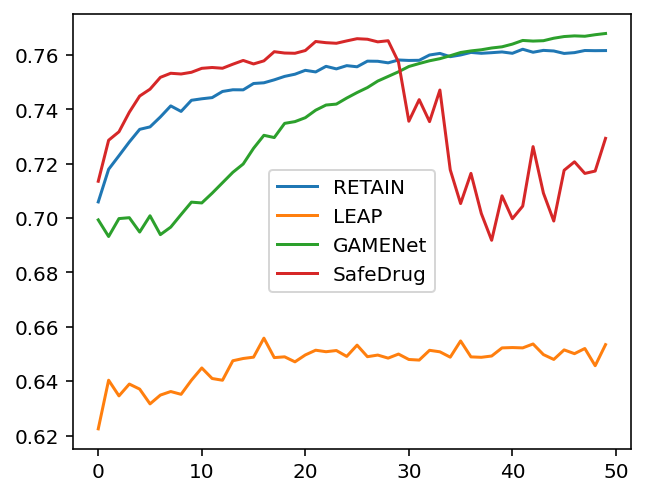

In [91]:
plt.plot(retain['prauc'], label='RETAIN')
plt.plot(leap['prauc'], label='LEAP')
plt.plot(gamenet['prauc'], label='GAMENet')
plt.plot(safedrug['prauc'], label='SafeDrug')

plt.legend()
plt.show()

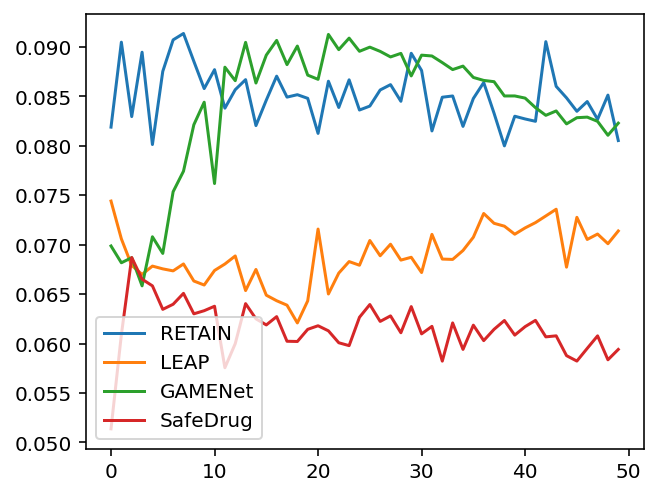

In [96]:
plt.plot(retain['ddi_rate'], label='RETAIN')
plt.plot(leap['ddi_rate'], label='LEAP')
plt.plot(gamenet['ddi_rate'], label='GAMENet')
plt.plot(safedrug['ddi_rate'], label='SafeDrug')

plt.legend()
plt.show()

## Ablation testing

In [92]:
sd_1 = pickle.load(open('saved/SafeDrug/history_SafeDrug_ablation_1.pkl', 'rb'))
sd_2 = pickle.load(open('saved/SafeDrug/history_SafeDrug_ablation_2.pkl', 'rb'))
sd_3 = pickle.load(open('saved/SafeDrug/history_SafeDrug_ablation_3.pkl', 'rb'))
sd_4 = pickle.load(open('saved/SafeDrug/history_SafeDrug_ablation_4.pkl', 'rb'))
sd_5 = pickle.load(open('saved/SafeDrug/history_SafeDrug_ablation_5.pkl', 'rb'))

In [93]:
all_ablations = {
    'Default SafeDrug': format_stats(safedrug, additional={'lr': {'val': 0.0005}, 'target_ddi': {'val': 0.06}}),
    'Abation 1': format_stats(sd_1, additional={'lr': {'val': 0.01}, 'target_ddi': {'val': 0.02}}),
    'Abation 2': format_stats(sd_2, additional={'lr': {'val': 0.001}, 'target_ddi': {'val': 0.03}}),
    'Abation 3': format_stats(sd_3, additional={'lr': {'val': 0.0001}, 'target_ddi': {'val': 0.04}}),
    'Abation 4': format_stats(sd_4, additional={'lr': {'val': 0.00001}, 'target_ddi': {'val': 0.05}}),
    'Abation 5': format_stats(sd_5, additional={'lr': {'val': 0.000001}, 'target_ddi': {'val': 0.06}})
}

pd.DataFrame(all_ablations).T

,lr,target_ddi,ddi_change%,ddi_rate,jaccard,avg_f1,prauc,med
Default SafeDrug,0.0005,0.06,2.52,0.0615 ± 0.0026,0.4851 ± 0.0212,0.6403 ± 0.0235,0.7396 ± 0.0226,19.0607 ± 0.5732
Abation 1,0.01,0.02,20.17,0.0240 ± 0.0071,0.4211 ± 0.0071,0.5844 ± 0.0064,0.6793 ± 0.0123,19.3800 ± 2.0774
Abation 2,0.001,0.03,49.16,0.0447 ± 0.0032,0.4687 ± 0.0061,0.6294 ± 0.0056,0.7282 ± 0.0039,17.4044 ± 0.6018
Abation 3,0.0001,0.04,16.57,0.0466 ± 0.0031,0.4440 ± 0.0126,0.6036 ± 0.0151,0.6997 ± 0.0230,17.1075 ± 1.0902
Abation 4,1e-05,0.05,-1.24,0.0494 ± 0.0077,0.4184 ± 0.0071,0.5821 ± 0.0073,0.6980 ± 0.0071,18.7053 ± 1.6778
Abation 5,1e-06,0.06,9.26,0.0656 ± 0.0055,0.4110 ± 0.0141,0.5745 ± 0.0148,0.6668 ± 0.0376,19.6280 ± 1.3323


In [94]:
# sd_1['prauc']

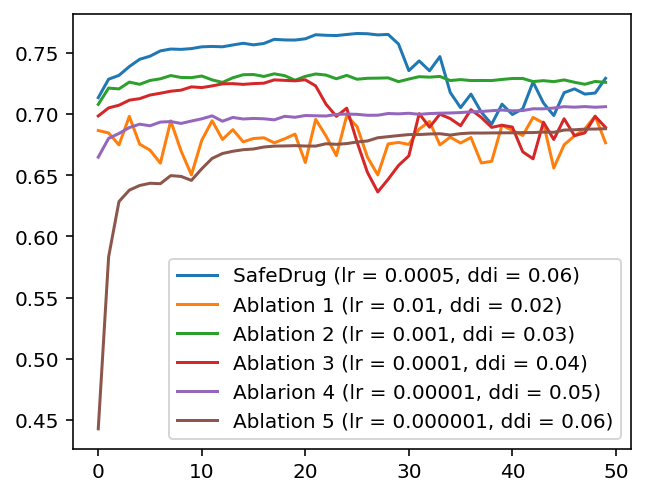

In [95]:
plt.plot(safedrug['prauc'], label='SafeDrug (lr = 0.0005, ddi = 0.06)')
plt.plot(sd_1['prauc'], label='Ablation 1 (lr = 0.01, ddi = 0.02)')
plt.plot(sd_2['prauc'], label='Ablation 2 (lr = 0.001, ddi = 0.03)')
plt.plot(sd_3['prauc'], label='Ablation 3 (lr = 0.0001, ddi = 0.04)')
plt.plot(sd_4['prauc'], label='Ablarion 4 (lr = 0.00001, ddi = 0.05)')
plt.plot(sd_5['prauc'], label='Ablation 5 (lr = 0.000001, ddi = 0.06)')

plt.legend()
plt.show()